In [1]:
# Instalar e importar o Yahoo Finance (yfinance)
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 5.5MB 15.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=d25c7c5b86e785e288938d59dea407cf77149343fae7839deb18912b402d36a4
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# Importar bibliotecas 
import pandas as pd
import numpy as np
import math
import torch
import matplotlib.pyplot as plt

In [3]:
# Exibir informações das ações da Petrobras
JBS = yf.Ticker('JBSS3.SA')
# JBS.info

In [4]:
# Coletar dados da Petrobras
data = yf.download('JBSS3.SA', start='2016-01-01', end='2020-11-20') #Hoje é 18 Nov 2020
# data

[*********************100%***********************]  1 of 1 completed


In [5]:
#Coletar somente o fechamento diário
data = data.Close

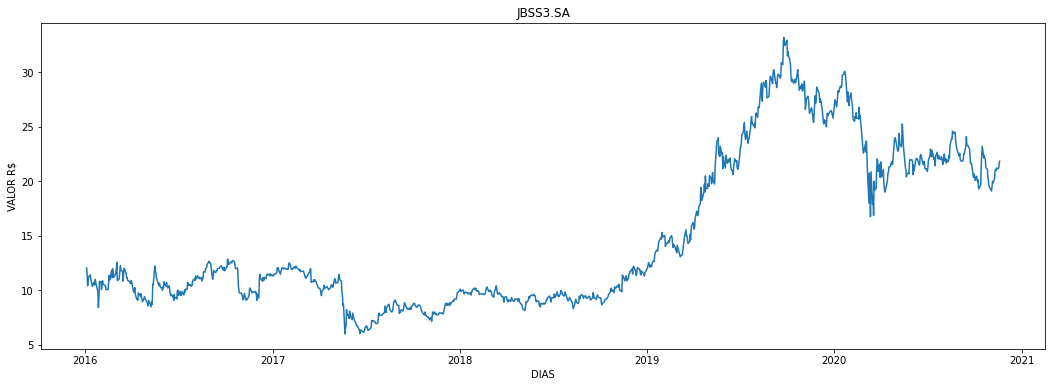

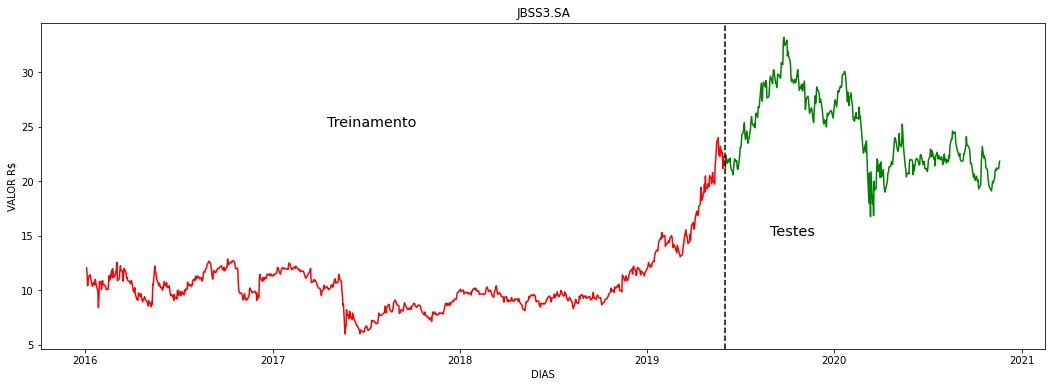

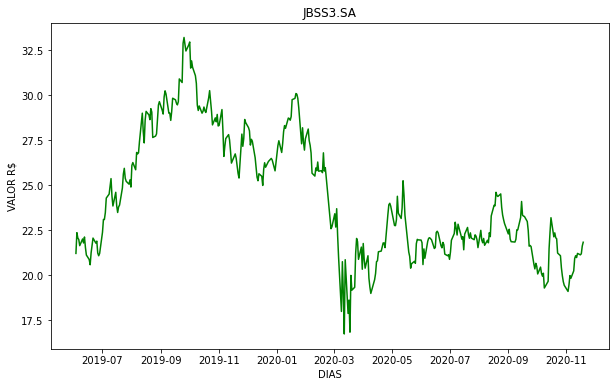

In [6]:
# Plotar o gráfico todo
plt.figure(figsize=(18, 6))
plt.plot(data, '-')
plt.xlabel('DIAS')
plt.ylabel('VALOR R$')
plt.title('JBSS3.SA')
plt.show()

# Plotar treinamento e teste
plt.figure(figsize=(18, 6))
plt.plot(data[:850], 'r-')
plt.plot(data[850:], 'g-')
plt.xlabel('DIAS')
plt.ylabel('VALOR R$')
plt.title('JBSS3.SA')
plt.axvline(data.index[850], 0, 30, color='k', linestyle='dashed', label='Teste')
plt.text(data.index[320], 25, 'Treinamento', fontsize='x-large')
plt.text(data.index[910], 15, 'Testes', fontsize='x-large')
plt.show()

# Plotar apenas teste
plt.figure(figsize=(10, 6))
plt.plot(data[850:], 'g-')
plt.xlabel('DIAS')
plt.ylabel('VALOR R$')
plt.title('JBSS3.SA')
plt.show()

In [7]:
# Criar janela deslizante
janelas = 50

data_final = np.zeros([data.size - janelas, janelas + 1])

for i in range(len(data_final)):
    for j in range(janelas+1):
        data_final[i][j] = data.iloc[i+j]
# print(data_final[:10])

In [8]:
# Normalizar entre 0 e 1
max = data_final.max()
min = data_final.min()
dif = data_final.max() - data_final.min()
data_final = (data_final - data_final.min())/dif

x = data_final[:, :-1]
y = data_final[:, -1]
# print(max, min, dif)

In [9]:
# Converter para tensor
#Entrada do treinamento
#Saída do treinamento
training_input = torch.FloatTensor(x[:850, :])
training_output = torch.FloatTensor(y[:850])

#Entrada do teste
#Saída do teste
test_input = torch.FloatTensor(x[850: , :])
test_output = torch.FloatTensor(y[850:])

# print(test_input)
# print(test_output)

In [10]:
# Classe do modelo da Rede Neural
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.relu(output)
        return output

In [11]:
# Criar a instância do modelo
input_size = training_input.size()[1]
hidden_size = 100
model = Net(input_size, hidden_size)
print(f'Entrada: {input_size}')
print(f'Escondida: {hidden_size}')
print(model)

Entrada: 50
Escondida: 100
Net(
  (fc1): Linear(in_features=50, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)


In [12]:
# Critério de erro
criterion = torch.nn.MSELoss()

# Criando os paramêtros (learning rate[obrigatória] e momentum[opcional])
lr = 0.09 #0.01
momentum = 0.03 #0.01
optimizer = torch.optim.SGD(model.parameters(), lr, momentum)

In [13]:
# Para visualizar os pesos
for param in model.parameters():
  # print(param)
  pass

In [14]:
# Treinamento
model.train()
epochs = 100001
errors = []
for epoch in range(epochs):
  optimizer.zero_grad()
  # Fazer o forward
  y_pred = model(training_input)
  # Cálculo do erro
  loss = criterion(y_pred.squeeze(), training_output)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Epoch: {epoch}. Train loss: {loss.item()}.')
  # Backpropagation
  loss.backward()
  optimizer.step()

Epoch: 0. Train loss: 0.029215265065431595.
Epoch: 1000. Train loss: 0.0006148726679384708.
Epoch: 2000. Train loss: 0.000461271294625476.
Epoch: 3000. Train loss: 0.0004001053748652339.
Epoch: 4000. Train loss: 0.00036063024890609086.
Epoch: 5000. Train loss: 0.00033303312375210226.
Epoch: 6000. Train loss: 0.00031144561944529414.
Epoch: 7000. Train loss: 0.0002947541943285614.
Epoch: 8000. Train loss: 0.00028117967303842306.
Epoch: 9000. Train loss: 0.0002697371819522232.
Epoch: 10000. Train loss: 0.0002600898442324251.
Epoch: 11000. Train loss: 0.0002518630644772202.
Epoch: 12000. Train loss: 0.0002446940343361348.
Epoch: 13000. Train loss: 0.0002383729297434911.
Epoch: 14000. Train loss: 0.00023282553593162447.
Epoch: 15000. Train loss: 0.0002278646279592067.
Epoch: 16000. Train loss: 0.00022346885816659778.
Epoch: 17000. Train loss: 0.00021950702648609877.
Epoch: 18000. Train loss: 0.0002159310388378799.
Epoch: 19000. Train loss: 0.00021269491116981953.
Epoch: 20000. Train loss: 0

In [15]:
# Testar o modelo já treinado
model.eval()
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.0012376317754387856


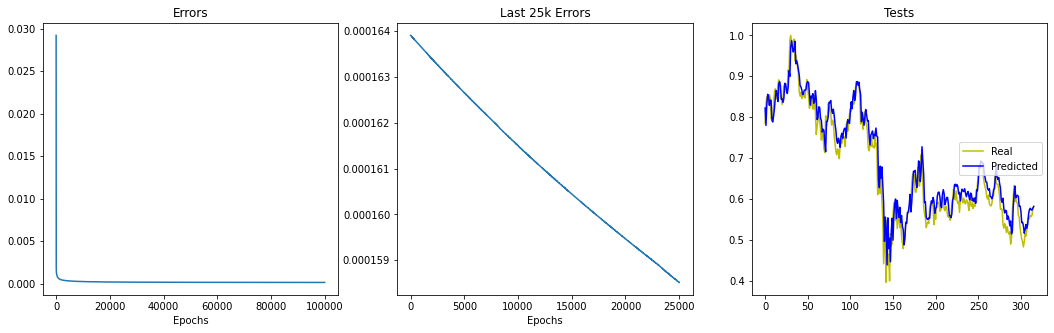

In [16]:
# Gráficos de erro e de previsão
def plotcharts(errors):
    errors = np.array(errors)
    lasterrors = np.array(errors[-25000:])
    plt.figure(figsize=(18, 5))
    graf01 = plt.subplot(1, 3, 1) # nrows, ncols, index
    graf01.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf02 = plt.subplot(1, 3, 2) # nrows, ncols, index
    graf02.set_title('Last 25k Errors')
    plt.plot(lasterrors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 3, 3)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'y-', label='Real')
    #plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b-', label='Predicted')
    #plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

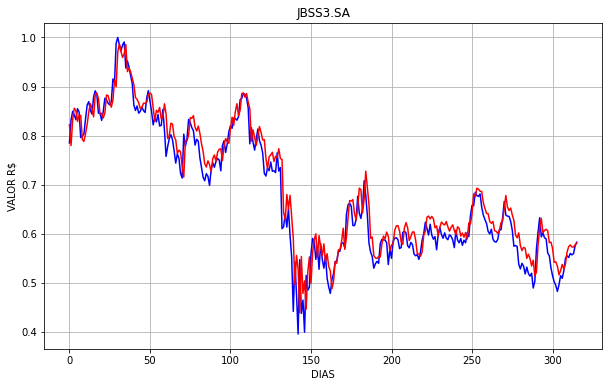

In [17]:
# Plotar detalhamento
plt.figure(figsize=(10, 6))
plt.plot(test_output.numpy(), 'b-') 
plt.plot(y_pred.detach().numpy(), 'r-')
plt.grid()
plt.xlabel('DIAS')
plt.ylabel('VALOR R$')
plt.title('JBSS3.SA')
plt.show()

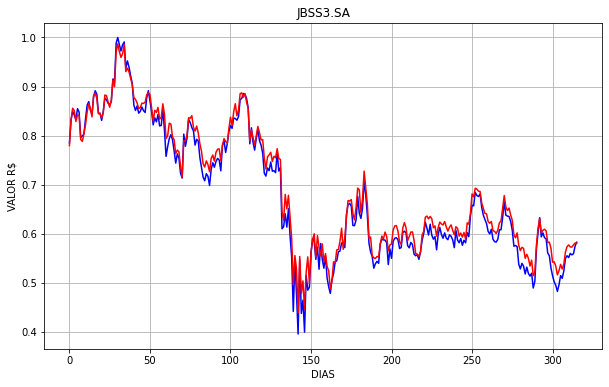

In [18]:
#Roll
roll = torch.roll(y_pred, -1, 0)
roll[-1] = roll[-2]
# Plotar detalhamento
plt.figure(figsize=(10, 6))
plt.plot(test_output.numpy(), 'b-') 
plt.plot(roll.detach().numpy(), 'r-')
plt.grid()
plt.xlabel('DIAS')
plt.ylabel('VALOR R$')
plt.title('JBSS3.SA')
plt.show()